In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel(r'C:/Users/DELL/OneDrive/Desktop/Wheat_Data.xlsx', sheet_name = 'Wheat_yearwise')
print(df.head())

      Year   Area  Production  Yield Area under Irrigation(%)
0  1950-51   9.75        6.46    663                    33.99
1  1951-52   9.47        6.18    653                    35.76
2  1952-53   9.83        7.50    763                    37.15
3  1953-54  10.68        8.02    750                    36.16
4  1954-55  11.26        9.04    803                       35


In [79]:
print(df.tail())

        Year   Area  Production  Yield Area under Irrigation(%)
63   2013-14  30.47       95.85   3146                    93.58
64   2014-15  31.47       86.53   2750                    94.19
65   2015-16  30.42       92.29   3034                        -
66   2016-17  30.79       98.51   3200                        -
67  2017-18*  29.58       99.70   3371                        -


In [80]:
df['Production'].describe()

count    68.000000
mean     45.051912
std      29.513436
min       6.180000
25%      15.470000
50%      44.195000
75%      69.432500
max      99.700000
Name: Production, dtype: float64

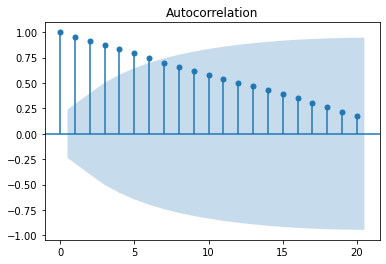

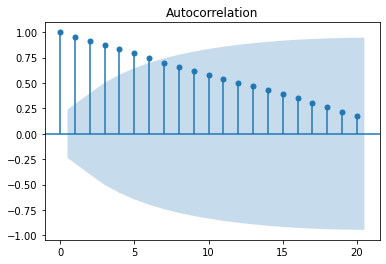

In [81]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Production'], lags=20)

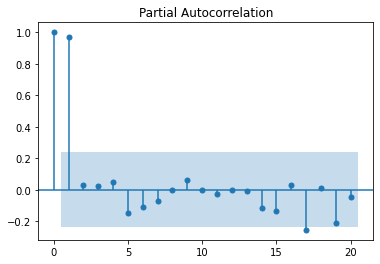

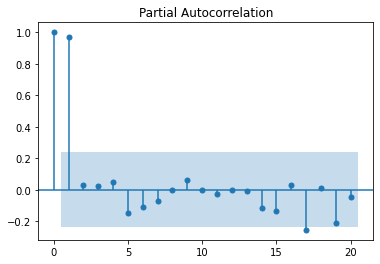

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Production'], lags = 20)

<AxesSubplot:xlabel='Year', ylabel='Production'>

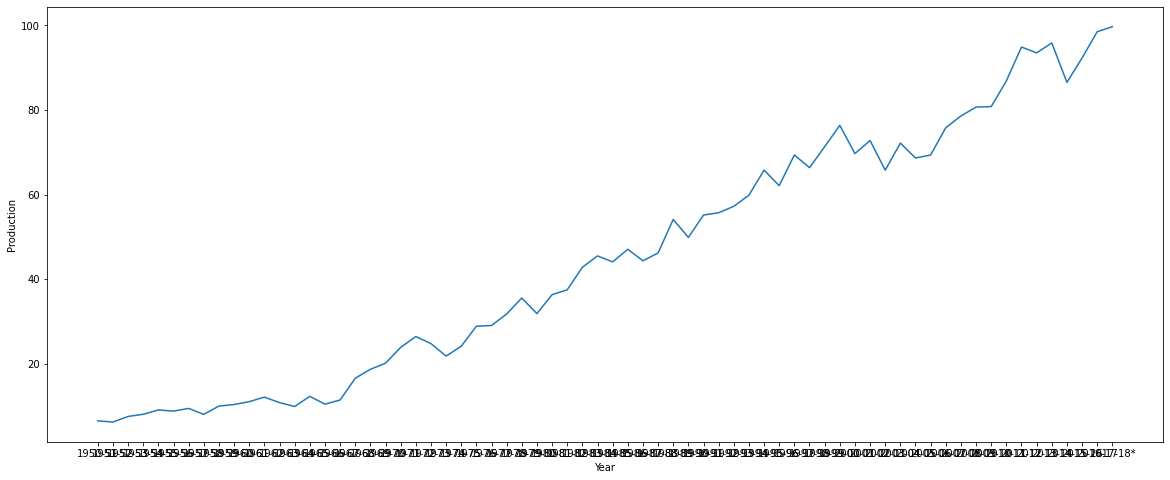

In [83]:
plt.figure(figsize=(20,8))
sns.lineplot(df['Year'], df['Production'])

In [84]:
# Train/Test Split
df_train = df[:61].copy()
df_test = df[61:].copy()

In [85]:
result=seasonal_decompose(df_train['Production'], model='multiplicable', period = 1)

<AxesSubplot:>

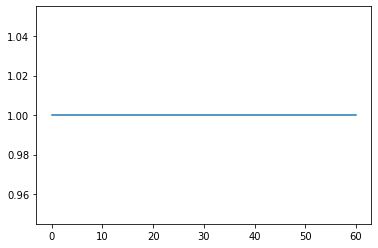

In [86]:
result.seasonal.plot()

<AxesSubplot:>

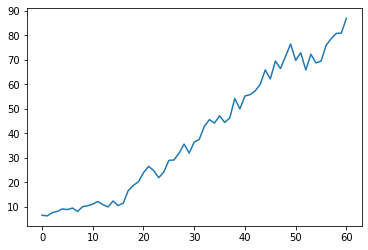

In [87]:
df_train['trend'] = result.trend
df_train['trend'].plot()

<AxesSubplot:>

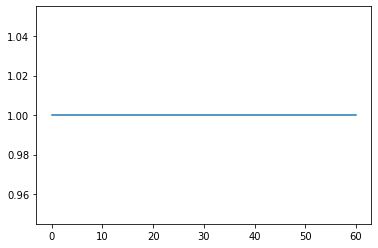

In [88]:
df_train['residual'] = result.resid
df_train['residual'].plot()

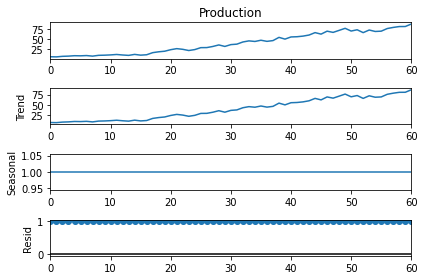

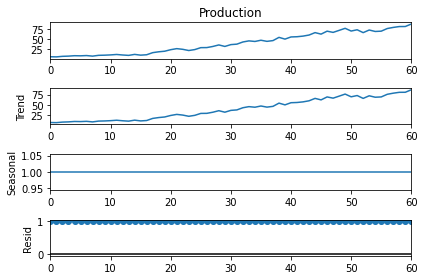

In [89]:
result.plot()

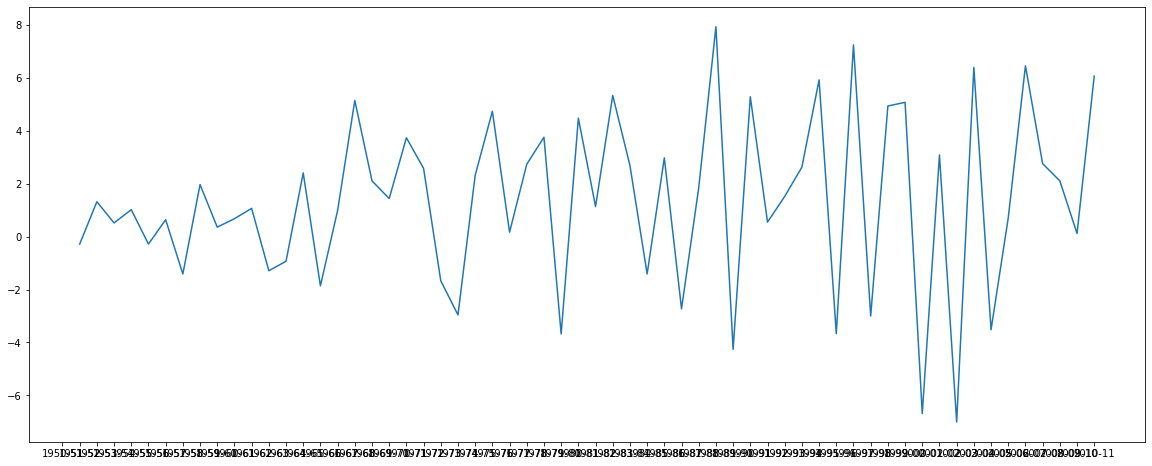

In [90]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
df_train['diff_Prod'] = df_train['Production'].diff()
pyplot.plot(df_train['Year'],df_train['diff_Prod'])
pyplot.show()

In [91]:
from statsmodels.tsa.stattools import adfuller

In [92]:
adft = adfuller(df_train['diff_Prod'].dropna(),autolag="AIC")

In [93]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] ,
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                    "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -1.202658e+01              Test Statistics
1  2.939444e-22                      p-value
2  0.000000e+00             No. of lags used
3  5.900000e+01  Number of observations used
4 -3.546395e+00          critical value (1%)
5 -2.911939e+00          critical value (5%)
6 -2.593652e+00         critical value (10%)


#### We can see that our data is stationary from the fact that our p-value is less than 5 percent and the test statistic is less than critical value

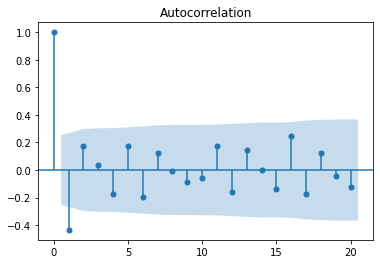

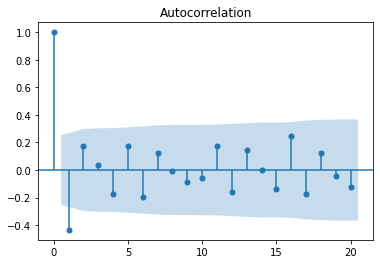

In [94]:
plot_acf(df_train['diff_Prod'].dropna(), lags = 20)

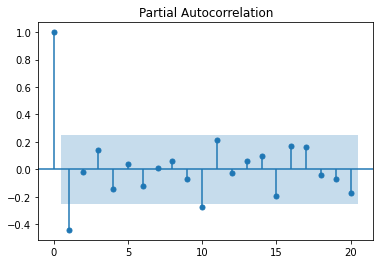

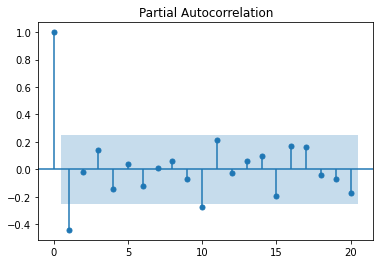

In [95]:
plot_pacf(df_train['diff_Prod'].dropna(), lags = 20)

# ARIMA Fitting

In [96]:
from statsmodels.tsa.arima_model import ARIMA

In [97]:
k = df_train['diff_Prod'].dropna()

In [98]:
arima_value = ARIMA(k, order=(1,0,1))
model1 = arima_value.fit()
print(model1.summary())

                              ARMA Model Results                              
Dep. Variable:              diff_Prod   No. Observations:                   60
Model:                     ARMA(1, 1)   Log Likelihood                -150.167
Method:                       css-mle   S.D. of innovations              2.951
Date:                Wed, 18 May 2022   AIC                            308.334
Time:                        21:05:02   BIC                            316.711
Sample:                             0   HQIC                           311.611
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.3237      0.261      5.071      0.000       0.812       1.835
ar.L1.diff_Prod    -0.4177      0.225     -1.857      0.063      -0.859       0.023
ma.L1.diff_Prod    -0.0339      

In [99]:
arima_value = ARIMA(k, order=(4,0,1))
model2 = arima_value.fit()
print(model2.summary())

                              ARMA Model Results                              
Dep. Variable:              diff_Prod   No. Observations:                   60
Model:                     ARMA(4, 1)   Log Likelihood                -148.923
Method:                       css-mle   S.D. of innovations              2.851
Date:                Wed, 18 May 2022   AIC                            311.846
Time:                        21:05:03   BIC                            326.506
Sample:                             0   HQIC                           317.580
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.3769      0.117     11.780      0.000       1.148       1.606
ar.L1.diff_Prod     0.5010      0.129      3.886      0.000       0.248       0.754
ar.L2.diff_Prod     0.4642      

In [100]:
residual = model1.resid

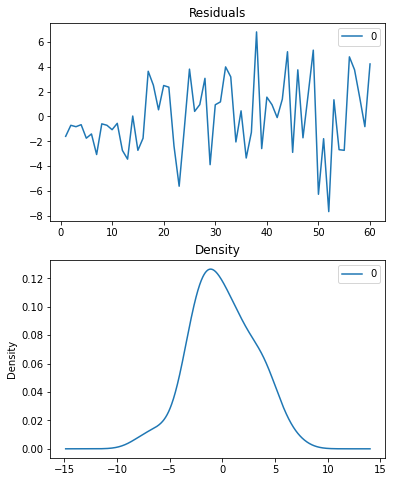

In [101]:
residuals = pd.DataFrame(model1.resid)
fig, ax = plt.subplots(2,1, figsize = [6,8])
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [102]:
df_train

,Year,Area,Production,Yield,Area under Irrigation(%),trend,residual,diff_Prod
0,1950-51,9.75,6.46,663,33.99,6.46,1.0,NaN
1,1951-52,9.47,6.18,653,35.76,6.18,1.0,-0.28
2,1952-53,9.83,7.50,763,37.15,7.50,1.0,1.32
3,1953-54,10.68,8.02,750,36.16,8.02,1.0,0.52
4,1954-55,11.26,9.04,803,35,9.04,1.0,1.02
...,...,...,...,...,...,...,...,...
56,2006-07,27.99,75.81,2708,90.85,75.81,1.0,6.46
57,2007-08,28.04,78.57,2802,91.32,78.57,1.0,2.76
58,2008-09,27.75,80.68,2907,91.69,80.68,1.0,2.11
59,2009-10,28.46,80.80,2839,91.76,80.80,1.0,0.12


In [103]:
df_test

,Year,Area,Production,Yield,Area under Irrigation(%)
61,2011-12,29.86,94.88,3177,93.05
62,2012-13,30.00,93.51,3117,93.45
63,2013-14,30.47,95.85,3146,93.58
64,2014-15,31.47,86.53,2750,94.19
65,2015-16,30.42,92.29,3034,-
66,2016-17,30.79,98.51,3200,-
67,2017-18*,29.58,99.70,3371,-


In [104]:
# arima
am = ARIMA(df_train['Production'], order=(1,1,1)) 
t = am.fit()
print(t.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Production   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -150.167
Method:                       css-mle   S.D. of innovations              2.951
Date:                Wed, 18 May 2022   AIC                            308.334
Time:                        21:05:03   BIC                            316.711
Sample:                             1   HQIC                           311.611
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.3237      0.261      5.071      0.000       0.812       1.835
ar.L1.D.Production    -0.4177      0.225     -1.857      0.063      -0.859       0.023
ma.L1.D.Production  

In [105]:
#df_train

In [106]:
# Make trend forecast
df_test['Production_prediction'] = t.predict(
    start=np.min(df_test.index), 
    end=np.max(df_test.index)
)
df_test

,Year,Area,Production,Yield,Area under Irrigation(%),Production_prediction
61,2011-12,29.86,94.88,3177,93.05,-0.801733
62,2012-13,30.00,93.51,3117,93.45,2.211510
63,2013-14,30.47,95.85,3146,93.58,0.952854
64,2014-15,31.47,86.53,2750,94.19,1.478605
65,2015-16,30.42,92.29,3034,-,1.258995
66,2016-17,30.79,98.51,3200,-,1.350728
67,2017-18*,29.58,99.70,3371,-,1.312410


In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = df_test['Production']
predictions = df_test['Production_prediction']
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 93.454575
